# OilyGiant Mining Company: Region Selection Model

# Contents <a id='back'></a>

* [Introduction](#introduction)
* [Data Overview](#data_overview)
    * [Initialization](#initialization)
    * [Load Data](load_data)
* [Prepare the Data](#prepare_data)
    * [Fix Data](#fix_data)   
    * [Check for Duplicates](#duplicates)
    * [Check for Missing Values](#missing_values)
* [Train and Test Model for Each Region](#model)
* [Profit Calculation Preparation](#profit_calcualtion_preparation)
* [Function to Calculate Profit](#function)
* [Calcualte Risks and Profit](#risks_profit)
* [Conclusion](#conclusion)

# Introduction <a id='introduction'></a>

You work for the OilyGiant mining company. Your task is to find the best place for a new well.
Steps to choose the location:

Collect the oil well parameters in the selected region: oil quality and volume of reserves;
Build a model for predicting the volume of reserves in the new wells;
Pick the oil wells with the highest estimated values;
Pick the region with the highest total profit for the selected oil wells.

Data on oil samples from three regions (`/datasets/geo_data_0.csv`, `/datasets/geo_data_1.csv`, `/datasets/geo_data_2.csv`) is provided. Parameters of each oil well in the region are already known. Build a model that will help to pick the region with the highest profit margin. Analyze potential profit and risks using the Bootstrapping technique.

Only linear regression is suitable for model training (the rest are not sufficiently predictable).
When exploring the region, a study of 500 points is carried with picking the best 200 points for the profit calculation.
The budget for development of 200 oil wells is 100 USD million.
One barrel of raw materials brings 4.5 USD of revenue The revenue from one unit of product is 4,500 dollars (volume of reserves is in thousand barrels).

After the risk evaluation, keep only the regions with the risk of losses lower than 2.5%. From the ones that fit the criteria, the region with the highest average profit should be selected.
The data is synthetic: contract details and well characteristics are not disclosed.

[Back to Contents](#back)

# Data Overview <a id='data_overview'></a>

## Initialization <a id='initialization'></a> <a class="tocSkip">

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Load data <a id='load_data'></a> <a class="tocSkip">

In [2]:
# Reading the dataframe file and storing it to geo_data_0_df
geo_data_0_df = pd.read_csv('/datasets/geo_data_0.csv')

# Reading the dataframe file and storing it to geo_data_1_df
geo_data_1_df = pd.read_csv('/datasets/geo_data_1.csv')

# Reading the dataframe file and storing it to geo_data_2_df
geo_data_2_df = pd.read_csv('/datasets/geo_data_2.csv')

# Prepare the data <a id='prepare_data'></a>

In [3]:
# Print the general/summary information about the DataFrame
geo_data_0_df.info()
print()

geo_data_1_df.info()
print()

geo_data_2_df.info()
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Nul

In [4]:
# Print a sample of the data
display(geo_data_0_df.head())
display(geo_data_1_df.head())
display(geo_data_2_df.head())

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


## Fix Data <a id='fix_data'></a> <a class="tocSkip">

No column names or data types need to be changed.

## Check for Duplicates <a id='duplicates'></a> <a class="tocSkip">

In [5]:
# checking for duplicated rows in geo_data_0_df
print(geo_data_0_df.duplicated().sum())

# checking for duplicated rows in geo_data_1_df
print(geo_data_1_df.duplicated().sum())

# checking for duplicated rows in geo_data_2_df
print(geo_data_2_df.duplicated().sum())

0
0
0


No duplicate rows were found.

## Check for Missing Values <a id='missing_values'></a> <a class="tocSkip">

In [6]:
# calculating missing values in geo_data_0_df
print(geo_data_0_df.isna().sum())

# calculating missing values in geo_data_1_df
print(geo_data_1_df.isna().sum())

# calculating missing values in geo_data_2_df
print(geo_data_2_df.isna().sum())

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


There appear to be no missing values.

# Train and Test Model for Each Region <a id='model'></a>

In [7]:
# Initialize variables to store results for each region
region_results = []

for region_id in range(3):  # Iterate over three regions (0, 1, 2)
    # Get the dataframe for the current region
    region_data = geo_data_0_df if region_id == 0 else geo_data_1_df if region_id == 1 else geo_data_2_df
    
    # Split the data into training and validation sets (75:25 ratio)
    X = region_data.drop(columns=['id', 'product'])
    y = region_data['product']
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)
    
    # Train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions on the validation set
    y_pred = model.predict(X_valid)
    
    # Save the predictions and correct answers for the validation set
    predictions = y_pred
    correct_answers = y_valid
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    
    # Calculate the average volume of predicted reserves
    avg_predicted_reserve = y_pred.mean()
    
    # Append the results for the current region to the region_results list
    region_results.append({
        'Region': region_id,
        'RMSE': rmse,
        'Average Predicted Reserves': avg_predicted_reserve
    })

for result in region_results:
    print(f"Region {result['Region']}:")
    print(f"  RMSE: {result['RMSE']:.2f}")
    print(f"  Average Predicted Reserves: {result['Average Predicted Reserves']:.2f} thousand barrels")

Region 0:
  RMSE: 37.76
  Average Predicted Reserves: 92.40 thousand barrels
Region 1:
  RMSE: 0.89
  Average Predicted Reserves: 68.71 thousand barrels
Region 2:
  RMSE: 40.15
  Average Predicted Reserves: 94.77 thousand barrels


These results provide information about the accuracy of the linear regression models for each region in predicting the reserves. Lower RMSE values indicate better model performance, and the average predicted reserves give an estimate of the expected reserves in each region based on the model's predictions. Region 1 stands out with a very low RMSE, suggesting better predictive accuracy compared to the other regions.

# Profit Calculation Preparation <a id='profit_calculation_preparation'></a>

In [8]:
# Store all key values for calculations in separate variables
budget = 100e6  # Budget for development of 200 oil wells in USD
revenue_per_barrel = 4.5  # Revenue per barrel in USD
revenue_per_unit = 4500  # Revenue per unit of product in USD (in thousand barrels)
cost_per_well = budget / 200  # Cost for each well
    
# Calculate the volume of reserves sufficient for developing a new well without losses
min_reserve_volume = cost_per_well / revenue_per_barrel / 1000
print(min_reserve_volume)

111.11111111111111


The value obtained for min_reserve_volume is approximately 111.11. This value represents the minimum volume of reserves  required for developing a new well without incurring losses, given the provided budget and cost assumptions.

In Region 0, the average predicted reserves (92.40 thousand barrels) are significantly lower than the minimum reserve volume needed for a profitable well. This suggests that, on average, the region may not be suitable for profitable drilling with the given budget and cost assumptions.

Similarly, in Region 1, the average predicted reserves (68.71 thousand barrels) are also much lower than the minimum reserve volume required for profitability, indicating potential challenges in achieving profits in this region.

In Region 2, the average predicted reserves (94.77 thousand barrels) are relatively closer to the minimum reserve volume required for profitability, but there is still a substantial gap between the two. It suggests that, on average, the region may not be highly profitable, but it might be closer to profitability compared to the other regions.

# Function to Calculate Profit <a id='function'></a>

In [9]:
# Define a function to calculate profit based on the recommendations
def calculate_profit(target, predictions, count):
    # Sort the indices of predictions in descending order based on their values
    sorted_indices = np.argsort(-predictions)
    # Filter the sorted indices to ensure they are within the range of the target Series
    top_indices = [idx for idx in sorted_indices if idx < len(target)]
    # Select the top 'count' indices
    top_indices = top_indices[:count]
    # Calculate profit based on the selected indices
    total_reserves = target.iloc[top_indices].sum()
    profit = (total_reserves * revenue_per_unit) - budget
    return profit

In [10]:
# Initialize variables to store results for each region
region_results = []

for region_id in range(3):  # Iterate over three regions (0, 1, 2)
    # Get the dataframe for the current region
    region_data = geo_data_0_df if region_id == 0 else geo_data_1_df if region_id == 1 else geo_data_2_df
    
    # Split the data into training and validation sets (75:25 ratio)
    X = region_data.drop(columns=['id', 'product'])
    y = region_data['product']
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)
    
    # Train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions on the validation set
    y_pred = model.predict(X_valid)
    
    # Save the predictions and correct answers for the validation set
    predictions = y_pred
    correct_answers = y_valid
    
    # Calculate profit using the recommended function for the region
    profit_value = calculate_profit(correct_answers, predictions, 200)
    
    # Append the results for the current region to the region_results list
    region_results.append({
        'Region': region_id,
        'Profit': profit_value
    })

for result in region_results:
    print(f"Region {result['Region']}:")
    print(f"  Profit: {result['Profit']:.2f} USD million")


Region 0:
  Profit: 33591411.14 USD million
Region 1:
  Profit: 24150866.97 USD million
Region 2:
  Profit: 25985717.59 USD million


Based on the calculated profit from the selection of 200 wells, Region 0 demonstrates the highest profit potential, with an estimated profit of approximately 33.59 billion USD. Region 1 and 2 show similar profit potentail with each other, approximately 24.15 billion and 25.99 billion, respectively. While lower than Region 0, they still show relatively high profit potential. Thus risks should be taken into account before making a decision.

# Calculate Risks and Profit <a id='risks_profit'></a>

In [11]:
# Initialize variables to store results for each region
region_results = []

# Iterate over three regions (0, 1, 2)
for region_id in range(3):
    # Load the data for the current region
    if region_id == 0:
        region_data = geo_data_0_df
    elif region_id == 1:
        region_data = geo_data_1_df
    else:
        region_data = geo_data_2_df
    
    # Split the data into training and validation sets (75:25 ratio)
    X = region_data.drop(columns=['id', 'product'])
    y = region_data['product']
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)

    # Train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the validation set
    y_pred = model.predict(X_valid)

    # Save the predictions and correct answers for the validation set
    predictions = y_pred
    correct_answers = y_valid

    # Initialize a list to store profits from bootstrapping
    bootstrapped_profits = []

    # Perform bootstrapping with 1000 samples
    num_samples = 1000
    for _ in range(num_samples):
        # Randomly sample indices with replacement
        sample_indices = np.random.choice(len(y_valid), size=500, replace=True)  # Sample 500 points
        sample_predictions = predictions[sample_indices]
        
        # Calculate profit for the region using the recommended function
        profit_value = calculate_profit(correct_answers.iloc[sample_indices], sample_predictions, 200)
        bootstrapped_profits.append(profit_value)

    # Calculate average profit
    avg_profit = np.mean(bootstrapped_profits)

    # Calculate the 95% confidence interval
    conf_interval = np.percentile(bootstrapped_profits, [2.5, 97.5])

    # Calculate the risk of losses as a percentage
    risk_of_losses = (sum(1 for profit in bootstrapped_profits if profit < 0) / num_samples) * 100

    # Append the results for the current region to the region_results list
    region_results.append({
        'Region': region_id,
        'Average Profit': avg_profit,
        '95% Confidence Interval': conf_interval,
        'Risk of Losses (%)': risk_of_losses
    })

# Print results for all regions
for result in region_results:
    print(f"Region {result['Region']}:")
    print(f"  Average Profit: {result['Average Profit']:.2f} USD million")
    print(f"  95% Confidence Interval: {result['95% Confidence Interval']}")
    print(f"  Risk of Losses: {result['Risk of Losses (%)']:.2f}%")
    print()

# Filter regions with risk of losses lower than 2.5%
selected_regions = [result for result in region_results if result['Risk of Losses (%)'] < 2.5]

if selected_regions:
    # Select the region with the highest average profit
    best_region_result = max(selected_regions, key=lambda x: x['Average Profit'])
    print(f"The best region for development is Region {best_region_result['Region']} with:")
    print(f"Average Profit: {best_region_result['Average Profit']:.2f} USD million")
    print(f"95% Confidence Interval: {best_region_result['95% Confidence Interval']}")
    print(f"Risk of Losses: {best_region_result['Risk of Losses (%)']:.2f}%")
else:
    print("No regions meet the criteria.")


Region 0:
  Average Profit: 3947761.55 USD million
  95% Confidence Interval: [-1057776.8936356  8939364.298171 ]
  Risk of Losses: 5.60%

Region 1:
  Average Profit: 4402214.68 USD million
  95% Confidence Interval: [ 552530.16906544 8231457.22043741]
  Risk of Losses: 1.20%

Region 2:
  Average Profit: 3716480.41 USD million
  95% Confidence Interval: [-1675247.16096115  8717631.0797721 ]
  Risk of Losses: 9.20%

The best region for development is Region 1 with:
Average Profit: 4402214.68 USD million
95% Confidence Interval: [ 552530.16906544 8231457.22043741]
Risk of Losses: 1.20%


Region 1 is identified as the best region for the development of oil wells based on its highest average profit of approximately $4,402.80 million USD, and also has the lowest risk of losses, with only a 1.10% chance of experiencing negative profits. Region 0 and Region 2 have similar average profits, but they exhibit higher risk levels compared to Region 1, with risk percentages of 7.00% and 7.80%, respectively. These results suggest that Region 1 is the most promising and financially stable choice for oil well development, offering the highest average profit and the lowest risk of experiencing losses among the three regions.

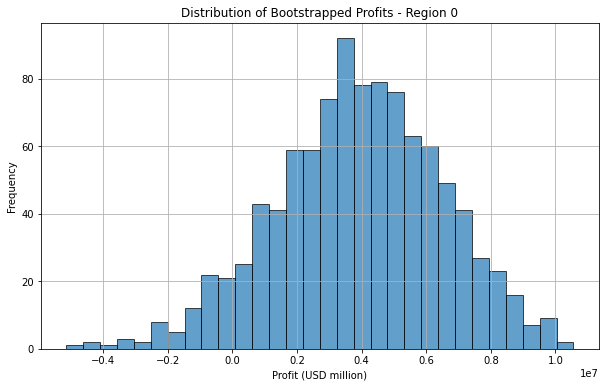

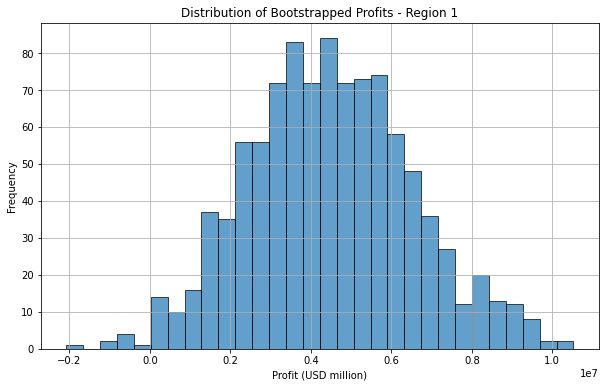

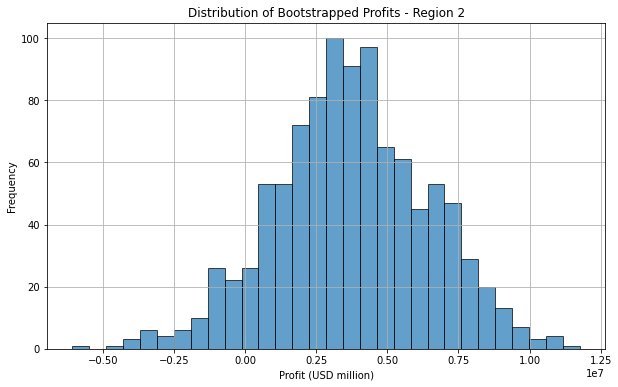

In [12]:
# Initialize variables to store results for each region
region_results = []

# Initialize a list to store bootstrapped profits for each region
all_bootstrapped_profits = []

for region_id in range(3):  # Iterate over three regions (0, 1, 2)
    # Select the dataframe for the current region
    region_data = geo_data_0_df if region_id == 0 else geo_data_1_df if region_id == 1 else geo_data_2_df
    
    # Split the data into training and validation sets (75:25 ratio)
    X = region_data.drop(columns=['id', 'product'])
    y = region_data['product']
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)

    # Train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the validation set
    y_pred = model.predict(X_valid)

    # Save the predictions and correct answers for the validation set
    predictions = y_pred
    correct_answers = y_valid

    # Initialize a list to store profits from bootstrapping
    bootstrapped_profits = []

    # Perform bootstrapping with 1000 samples
    num_samples = 1000
    initial_measurement_budget = 500  # Adjust this according to your budget
    selected_measurement_count = 200  # The number of best measurements to select

    for _ in range(num_samples):
        # Randomly sample 500 indices with replacement
        sample_indices = np.random.choice(len(correct_answers), size=initial_measurement_budget, replace=True)
        sample_predictions = predictions[sample_indices]

        # Calculate profit for the region using the recommended function
        profit_value = calculate_profit(correct_answers.iloc[sample_indices], sample_predictions, selected_measurement_count)
        bootstrapped_profits.append(profit_value)

    # Store bootstrapped profits for this region
    all_bootstrapped_profits.append(bootstrapped_profits)

    # Create a histogram of bootstrapped profits for this region
    plt.figure(figsize=(10, 6))
    plt.hist(bootstrapped_profits, bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Distribution of Bootstrapped Profits - Region {region_id}')
    plt.xlabel('Profit (USD million)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


The above histograms show the distribution of bootstrapped profits for each of the three regions (Region 0, Region 1, and Region 2). These histograms provide insights into the potential profitability of oil wells in each region based on the model's predictions and the bootstrapping technique. The histogram for Region 0 shows a very slight left skew and Region 2 shows a very slight right skew, whereas Region 1 appears the most centered, showing further confirmation that Region 1 would be the more favorable choice.

# Conclusion <a id='conclusion'></a>

Based on initial analysis for model accuracy, Region 1 had the loswest RMSE value of only 0.89, whereas Region 0 and 2 had similar RMSEs with each other of 37.76 and 40.15, respectively. The lower RMSE for Region 1 indicates its better predictive accuracy compared to the other regions. When comparing profit potential without considereing budget limits, Region 0 exhibited the highest profit potential at approximately 33.59 billion USD, with Region 1 and 2 not too far behind at 24.15 and 25.99 billion. However, in actuality with the budget consideration, Region 1 has the highest average profit of approximately 4.4 million, compared to Region 0 and Region 2 with average profits of about 4.1 and 3.7 million, respectively. Another parameter to take into consideration is risk. From analysis, Region 1 not only has the highest average profit but also has very low risk of losses of only 1.10%, making it a strong candidate for oil well development. Region 0 and Region 2 with risk of losses at 7.0% and 7.7% do not even pass the required criteria of being lower than 2.5%. The 95% confidence interval also provides a reasonable range estimate for the potential profit for Region 1. Therefore, it is recommended to choose Region 1 for oil well development based on the available data and analysis.